<a href="https://colab.research.google.com/github/biacandiani/aulas_biorreatores/blob/main/aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 4.22709615e-05 -2.47474465e-06]
 [-2.47474465e-06  1.53072380e-07]]
Cx0 otimizado: 0.9695385266152508
mi otimizado: 0.11367947716180035
R²: 0.9999321450354598


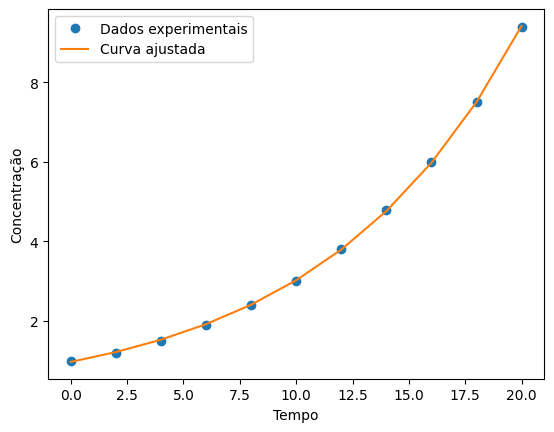

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def cresc_microbiano(t, Cx0, mi):
    return Cx0 * np.exp(mi * t)

# Dados experimentais
tempo_experimental = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
concentracao_experimental = np.array([1.0, 1.2, 1.5, 1.9, 2.4, 3.0, 3.8, 4.8, 6.0, 7.5, 9.4])

# Ajuste da curva
parametros_otimizados, matriz_covariancia = curve_fit(cresc_microbiano, tempo_experimental, concentracao_experimental)
Cx0_otimizado, mi_otimizado = parametros_otimizados
# curve_fit

print(matriz_covariancia)
# Na diagonal principal da matriz, Cx0 e mi não estão correlacionados.
print(f"Cx0 otimizado: {Cx0_otimizado}")
print(f"mi otimizado: {mi_otimizado}")

# Valores previstos pelo modelo
concentracao_prevista = cresc_microbiano(tempo_experimental, Cx0_otimizado, mi_otimizado)

# Cálculo do R² → calcula coeficiente de correlação
r_squared = r2_score(concentracao_experimental, concentracao_prevista)
print(f"R²: {r_squared}")

# Gráfico
plt.plot(tempo_experimental, concentracao_experimental, 'o', label='Dados experimentais')
plt.plot(tempo_experimental, concentracao_prevista, '-', label='Curva ajustada')
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

**Algoritmo genético:** monta x pares de parâmetros com aleatoriedade, escolhe os que possuem um erro menor e gera descendentes dos melhores pares. Deve definir limite para os valores aleatórios.


  **Exemplo:** Cx e mi. Temos pares com 10, 20, 50 e 500.Os pares escolhidos serão os dois primeiros, já que estão mais próximos entre eles (o erro é menor). Então, os descendentes serão gerados a partir deles. O limite de Cx será 0, por exemplo.


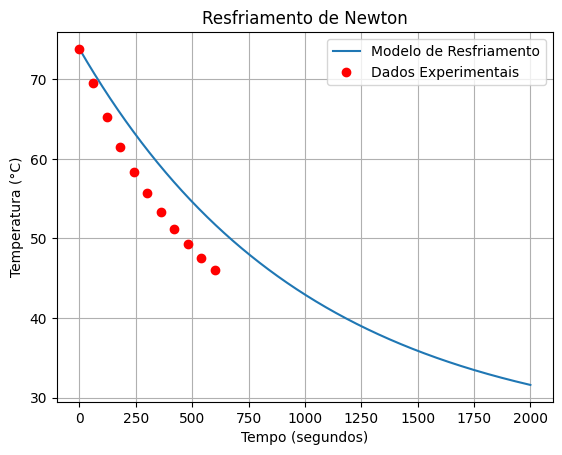

In [2]:
from scipy.integrate import odeint
import numpy as np #banco de dados numérico
import matplotlib.pyplot as plt #banco de dados de gráficos
from scipy.optimize import differential_evolution # função de algoritmo genético

# Apresentação da função odeint
# Apresentação da função differential evolution
# Apresentação do problema de resfriamento de corpos

def resfriamento_newton(T, t, Ta, k):
    """Modelo de resfriamento de Newton: dT/dt = -k(T - Ta)"""
    dTdt = -k * (T - Ta)
    return dTdt

# Parâmetros
T0 = 73.81  # Temperatura inicial do corpo (°C)
Ta = 25  # Temperatura ambiente (°C)
k_init = 0.001  # Constante de resfriamento (1/segundo) → chutando um valor, modelo matemático mais simples

# Intervalo de tempo
t = np.linspace(0, 2000, 1000)  # criando o vetor tempo → vai de 0 a 2000 com 1000 intervalos

# Resolve a EDO
T = odeint(resfriamento_newton, T0, t, args=(Ta, k_init))

# Pontos experimentais
Tempo = [0,60,120,180,240,300,360,420,480,540,600]
Temperatura = [73.81,69.56,65.31,61.44,58.38,55.69,53.31,51.13,49.25,47.5,46.06]

# Plot modelo e pontos experimentais juntos
plt.plot(t, T, label='Modelo de Resfriamento')
plt.plot(Tempo, Temperatura, "or", label='Dados Experimentais')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Temperatura (°C)')
plt.title('Resfriamento de Newton')
plt.legend()
plt.grid(True)
plt.show()

True
             message: Optimization terminated successfully.
             success: True
                 fun: 3.733694293043863
                   x: [ 1.486e-03]
                 nit: 12
                nfev: 13022
          population: [[ 1.486e-03]
                       [ 1.486e-03]
                       ...
                       [ 1.487e-03]
                       [ 1.486e-03]]
 population_energies: [ 3.734e+00  3.734e+00 ...  3.734e+00  3.734e+00]
                 jac: [ 7.640e+00]
Valor otimizado de k: 0.001486
R²: 0.9956
Resíduos:
3.733694293043863
Valores obtidos pelo odeint:
[73.81       69.64631144 65.83780087 62.35417109 59.16771002 56.25306721
 53.5870548  51.14846387 48.91789462 46.87760189 45.01135485]


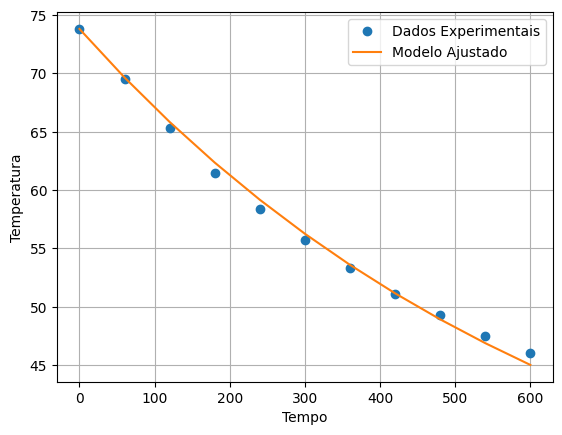

In [3]:
from scipy.integrate import odeint
from scipy.optimize import differential_evolution
import numpy as np
import matplotlib.pyplot as plt
# --- BIBLIOTECAS ---

# NumPy para operações numéricas e arrays
# Matplotlib para plotar gráficos
# odeint para resolver a EDO
# differential_evolution para otimização com algoritmos genéticos

# --- DEFINIÇÕES DE FUNÇÕES ---

def resfriamento_newton(T, t, Ta, k):
    """
    Modelo de resfriamento de Newton: dT/dt = -k(T - Ta)
    Args:
        T: Temperatura do objeto no tempo t.
        t: Tempo.
        Ta: Temperatura ambiente (constante).
        k: Constante de resfriamento.

    Returns:
        dTdt: Taxa de variação da temperatura em relação ao tempo.
    """
    dTdt = -k * (T - Ta)
    return dTdt

def funcao_obj(k, Tempo, Temperatura, Ta):
  T0 = Temperatura[0]  # Temperatura inicial
  sim_T = odeint(resfriamento_newton, T0, Tempo, args=(Ta, k)) # Integra
  res = sim_T.flatten() - Temperatura
  return np.sum(res**2) # Calcula o score

# Dados experimentais

Tempo = np.array([0,60,120,180,240,300,360,420,480,540,600])
Temperatura = np.array([73.81,69.56,65.31,61.44,58.38,55.69,53.31,51.13,49.25,47.5,46.06])
Ta = 25 # Temperatura ambiente (fixa)

# Otimização
bounds = [(0, 0.1)] # Intervalo de busca para o k. No de cima, vi que 0.1 ficou acima, por isso determinei esses valores.
args = (Tempo, Temperatura, Ta)  # Argumentos fixos para função objetiva

resultado = differential_evolution(
    funcao_obj, bounds, args=args,
    popsize=1000, maxiter=10000  # Experimente diferentes estratégias. Faz 1000 pares, calcula o score deles. Forma uma nova geração (até 10.000) com 1000 pares, calcula o score, etc.
    # popsize são quantos pares de algoritmos genéticos por geração. Com menos pares, eles precisam de mais gerações para achar o chute correto.
    # maxiter é o máximo de gerações que ele pode criar.
)

# Resultados

k_otimo = resultado.x[0]
print(resultado.success)
print(resultado)
print(f'Valor otimizado de k: {k_otimo:.6f}')

# Visualização
T_sim = odeint(resfriamento_newton, Temperatura[0], Tempo, args=(Ta, k_otimo)).flatten()

# Cálculo do R²
SSR = np.sum((Temperatura - T_sim)**2)
SST = np.sum((Temperatura - np.mean(Temperatura))**2)
R2 = 1 - SSR / SST
print(f'R²: {R2:.4f}')

# Calculando e exibindo os resíduos
residuos = Temperatura - T_sim # quero minimizar isso
print("Resíduos:")
print(np.sum(residuos**2))

# Exibindo os valores obtidos pelo odeint
print("Valores obtidos pelo odeint:")
print(T_sim)

# Vizualização
plt.plot(Tempo, Temperatura, 'o', label='Dados Experimentais')
plt.plot(Tempo, T_sim, label='Modelo Ajustado')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend()
plt.grid()
plt.show()


**Exercício proposto em sala de aula:** Alterar o código acima com os dados experimentais da aula 4 usando mi e Cx.

True
             message: Optimization terminated successfully.
             success: True
                 fun: 8.144972741032122
                   x: [ 1.000e-01]
                 nit: 16
                nfev: 17002
          population: [[ 1.000e-01]
                       [ 1.000e-01]
                       ...
                       [ 1.000e-01]
                       [ 1.000e-01]]
 population_energies: [ 8.145e+00  8.145e+00 ...  8.149e+00  8.146e+00]
Valor otimizado de mi: 0.100000
R²: 0.8941
Resíduos:
8.144972741032122
Valores obtidos pelo odeint:
[1.         1.22140273 1.49182464 1.82211871 2.22554088 2.71828168
 3.32011669 4.05519964 4.95303196 6.04964681 7.38905517]


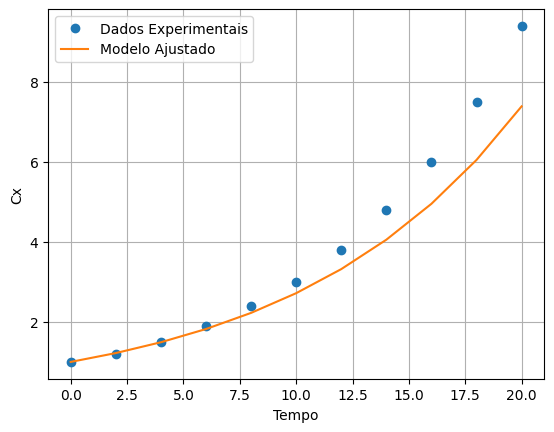

In [8]:
from scipy.integrate import odeint
from scipy.optimize import differential_evolution
import numpy as np
import matplotlib.pyplot as plt

def exercicio(Cx, t, mi):
    dCxdt = Cx*mi
    return dCxdt

def funcao_obj(params, tempo_experimental, concentracao_experimental):
  mi = params[0]
  Cx0 = concentracao_experimental[0]
  sim_T = odeint(exercicio, Cx0, tempo_experimental, args=(mi, ))
  res = sim_T.flatten() - concentracao_experimental
  return np.sum(res**2)

# Dados experimentais
tempo_experimental = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
concentracao_experimental = np.array([1.0, 1.2, 1.5, 1.9, 2.4, 3.0, 3.8, 4.8, 6.0, 7.5, 9.4])

# Otimização
bounds = [(0, 0.1)]
args = (tempo_experimental, concentracao_experimental)

resultado = differential_evolution(
    funcao_obj, bounds, args=args,
    popsize=1000, maxiter=10000
)

# Resultados

mi_otimo = resultado.x[0]
print(resultado.success)
print(resultado)
print(f'Valor otimizado de mi: {mi_otimo:.6f}')

# Visualização
Cx_sim = odeint(exercicio, concentracao_experimental[0], tempo_experimental, args=(mi_otimo, )).flatten()

# Cálculo do R²
SSR = np.sum((concentracao_experimental - Cx_sim)**2)
SST = np.sum((concentracao_experimental - np.mean(concentracao_experimental))**2)
R2 = 1 - SSR / SST
print(f'R²: {R2:.4f}')

# Calculando e exibindo os resíduos
residuos = concentracao_experimental - Cx_sim
print("Resíduos:")
print(np.sum(residuos**2))

# Exibindo os valores obtidos pelo odeint
print("Valores obtidos pelo odeint:")
print(Cx_sim)

# Vizualização
plt.plot(tempo_experimental, concentracao_experimental, 'o', label='Dados Experimentais')
plt.plot(tempo_experimental, Cx_sim, label='Modelo Ajustado')
plt.xlabel('Tempo')
plt.ylabel('Cx')
plt.legend()
plt.grid()
plt.show()